In [9]:
! pip install pandas transformers matplotlib



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.6 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 11.2 MB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [10]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer


In [11]:
#Bringing in dataset
training_dataset = pd.read_json("./data/train.jsonl", lines=True)
training_dataset.head()


,text,label,label_text
0,"a stirring , funny and finally transporting re...",4,very positive
1,apparently reassembled from the cutting-room f...,1,negative
2,they presume their audience wo n't sit still f...,1,negative
3,the entire movie is filled with deja vu moments .,2,neutral
4,this is a visually stunning rumination on love...,3,positive


| Text Label   |      Label      |
|----------|:-------------:|
| very negative |  0 |
| negative|    1   |
| neutral | 2 |
| positive | 3 |
| very positive | 4 |

<Axes: >

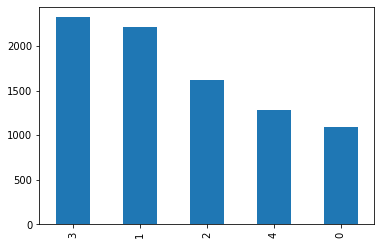

In [12]:
#View dataset distribution
training_dataset['label'].value_counts().plot(kind="bar")

In [13]:
#Split features and labels

X_train = training_dataset['text']
y_train = training_dataset['label']

In [14]:
#Vectorize features using 
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [15]:
seq_len = 512
num_samples = len(X_train)

In [16]:
tokens = tokenizer(X_train.tolist(), max_length=seq_len, padding='max_length', truncation=True, add_special_tokens=True, return_tensors='np')

In [17]:
X_train_ids = tokens['input_ids'] #Input ids of the words

In [18]:
X_train_masks = tokens['attention_mask']

In [19]:
#Saving the X_train numpy files for the model
with open('./data/preprocessed/X_train_ids.npy', 'wb') as f:
    np.save(f, X_train_ids)
    
with open('./data/preprocessed/X_train_masks', 'wb') as f:
    np.save(f, X_train_masks)

In [20]:
#One hot encode the labels
NUM_CLASSES = 5

y_train_encoded = np.zeros((num_samples, NUM_CLASSES))

for index in range(num_samples):
    label = y_train[index]
    y_train_encoded[index][label] = 1

y_train_encoded

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [21]:
#Save the one_hot_encoded y_train

with open("./data/preprocessed/y_train_encoded.npy", "wb") as f:
    np.save(f, y_train_encoded)